# Day2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1943 MCP 뉴런

In [ ]:
# 입력
x = np.linspace(0.1, 1.1, 5)
random = np.random.default_rng(1)
# 가중치
w = random.normal(0, 1, size=x.shape)
# 취합
z = np.dot(x, w)
print(f"z: {z:.2f}")
# 활성화 함수
b = 0.3
y = 1 if z > b else 0
# 결과
print(f"y: {y}")

pd.DataFrame({"x": x, "w": w, "x*w": x*w}).round(2).T

z: 0.41
y: 1


,0,1,2,3,4
x,0.10,0.35,0.60,0.85,1.10
w,0.35,0.82,0.33,-1.30,0.91
x*w,0.03,0.29,0.20,-1.11,1.00


In [14]:
def MCP_neuron(x, w, b):
    z = np.dot(x, w)
    y = 1 if z > b else 0
    return y

y = MCP_neuron(x, w, b)
print(f'x={x.round(2)} => f(x;w,b) = {y}')

x=[0.1  0.35 0.6  0.85 1.1 ] => f(x;w,b) = 1


## 논리회로

In [29]:
def logi(w, b):
    for xi in np.array([(0,0), (0,1), (1,0), (1,1)]):
        yi = MCP_neuron(xi, w, b)
        print(f'x={xi} => {yi}')

w_and = np.array([0.5, 0.5])
b_and = 0.7
print("AND 게이트")
logi(w_and, b_and)

AND 게이트
x=[0 0] => 0
x=[0 1] => 0
x=[1 0] => 0
x=[1 1] => 1


$$
\begin{aligned}
z &= w^{\top} x + b = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
\\
y &= 
\begin{cases}
+1 \quad z > 0 \\
-1 \quad z \leq 0
\end{cases}
\end{aligned}
$$

입력 벡터 $\mathbf{x} = \left(x_1, x_2\right)$ 경우,

$$
z = w_1 x_1 + w_2 x_2 + b
$$

결정경계 $z = 0$ 

$$
\begin{aligned}
0 &= w_1 x_1 + w_2 x_2 + b
\\
x_2 &= \frac{w_1}{-w_2} x_1 + \frac{b}{-w_2}
\end{aligned}
$$

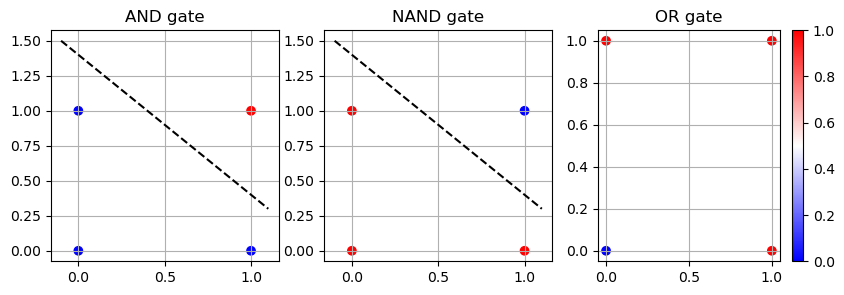

In [42]:
Xs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
plt.figure(figsize=(10, 3)) # 그림틀 크기 지정: 가로, 세로
plt.subplot(1, 3, 1) # 1행 3열 중 첫 번째 그림

y_and = np.array([0, 0, 0, 1])
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_and, cmap='bwr')

# 결정경계

z0 = lambda x, w, b: (w[0]*x + b) / -w[1]
x = np.linspace(-0.1, 1.1, 10)
plt.plot(x, z0(x, w_and, -b_and), 'k--')
plt.title('AND gate')
plt.grid()

plt.subplot(1, 3, 2) # 1행 3열 중 두 번째 그림
w_nand = np.array([-0.5, -0.5])
b_nand = 0.7
z_nand = lambda x, w, b: (w_nand[0]*x + b_nand) / -w_nand[1]
plt.plot(x, z_nand(x, w_nand, -b_nand), 'k--')
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_nand, cmap='bwr')
plt.title('NAND gate')
plt.grid()

plt.subplot(1, 3, 3) # 1행 3열 중 세 번째 그림
y_or = np.array([0, 1, 1, 1])
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_or, cmap='bwr')
plt.title('OR gate')
plt.grid()

plt.colorbar()
plt.show()

## 1958 퍼셉트론

In [45]:
samples = np.arange(10)

pd.DataFrame({
    "samples": samples,
    "x<5": samples < 5,
    'np.where': np.where(samples < 5, 1, -1)
}).T

,0,1,2,3,4,5,6,7,8,9
samples,0,1,2,3,4,5,6,7,8,9
x<5,True,True,True,True,True,False,False,False,False,False
np.where,1,1,1,1,1,-1,-1,-1,-1,-1


In [47]:
samples = np.random.default_rng(1).normal(0, 1, size=(3, 4))
print(samples.round(2))
print(np.where(samples > 0, 1, -1))

[[ 0.35  0.82  0.33 -1.3 ]
 [ 0.91  0.45 -0.54  0.58]
 [ 0.36  0.29  0.03  0.55]]
[[ 1  1  1 -1]
 [ 1  1 -1  1]
 [ 1  1  1  1]]


In [ ]:
class Perceptron:
    def __init__(self, w=None, b=None):
        self.w = w
        self.b = b
    
    def __call__(self, x):
        z = np.dot(x, self.w) + self.b
        y = np.where(z > 0, 1, -1) 
        return y

    def fit(self, data, target, 학습횟수, 학습률 = 1.0):
        """학습 알고리즘"""
        표본수, 특성수 = data.shape
        self.w = np.zeros(특성수, dtype=np.float32)
        self.b = 0.0

        매개변수변화 = []

        #각 표본의 오차 계산
        for epoch in range(학습횟수):
            매개변수변화.append(np.append(self.b, self.w.copy()))
            for xi, yi in zip(data, target):
                예측값 = self(xi)
                # self : 퍼셉트론 객체 , 같은 방식으로 하는 법 : self.__call__(xi)임. 
                #self.__init__()은 생성자 메서드라 호출 불가, __fnc__()가 fun()와의 차이점 : 객체가 함수처럼 호출될 수 있게 함.
                오차 = yi - 예측값
                갱신 = 오차 * 학습률
                self.w += 갱신 * xi
                self.b += 갱신
        return 매개변수변화


Xs = np.array([[0,0], [0,1], [1,0], [1,1]])

# AND = Perceptron(w=np.array([0.5, 0.5]), b=-0.7)
AND = Perceptron()
y_and = np.array([-1, -1, -1, 1])
and_params = AND.fit(Xs, y_and, 학습횟수=10, 학습률=1)
# print(pd.DataFrame(and_params, columns=['b', 'w1', 'w2']))
assert np.all(AND(Xs) == y_and)

# NAND = Perceptron(w=np.array([-0.5, -0.5]), b=0.7)
# y_nand = np.array([1, 1, 1, -1])
# assert np.all(NAND(Xs) == y_nand)
NAND = Perceptron()
y_nand = np.array([1, 1, 1, -1])
nand_params = NAND.fit(Xs, y_nand, 학습횟수=10, 학습률=1)
# print(pd.DataFrame(nand_params, columns=['b', 'w1', 'w2']))
assert np.all(NAND(Xs) == y_nand)

# OR = Perceptron(w=np.array([0.5, 0.5]), b=-0.2)
# y_or = np.array([-1, 1, 1, 1])
# assert np.all(OR(Xs) == y_or)
OR = Perceptron()
y_or = np.array([-1, 1, 1, 1])
or_params = OR.fit(Xs, y_or, 학습횟수=10, 학습률=1)
print(pd.DataFrame(or_params, columns=['b', 'w1', 'w2']))
assert np.all(OR(Xs) == y_or)

TypeError: BaseSGDClassifier.fit() got an unexpected keyword argument '학습횟수'

## 종양 데이터셋
미국 위스콘신 대학 병원 제공 실측 데이터

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.data.shape)
print(cancer.target_names, '->', np.unique(cancer.target))
pd.DataFrame(cancer.data, columns=cancer.feature_names).head().round(2)

(569, 30)
['malignant' 'benign'] -> [0 1]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,0.08,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,0.06,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,0.06,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,0.10,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,0.06,...,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08


In [69]:
종양모형 = Perceptron()

# 알고리즘의 기대 출력에 맞춰 목표값 변환
y_cancer = np.where(cancer.target == 0, -1, 1)  # 악성: -1, 양성: 1
print(np.unique(cancer.target), '->', np.unique(y_cancer))
params = 종양모형.fit(cancer.data, y_cancer, 학습횟수=100, 학습률=0.1)
예측 = 종양모형(cancer.data)
채점 =예측 == y_cancer
print(f"정확도: {채점.sum()}/{len(y_cancer)} = {채점.mean():.2%}")
pd.DataFrame(params).round(2).tail()


[0 1] -> [-1  1]
정확도: 515/569 = 90.51%


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
95,126.6,955.21,-316.26,4752.26,738.05,4.04,-26.84,-51.32,-18.54,6.98,...,1037.51,-791.84,4113.14,-1853.17,2.43,-92.69,-136.69,-31.58,-3.92,-0.66
96,127.0,957.86,-331.43,4757.64,712.01,4.02,-27.12,-51.76,-18.70,6.93,...,1040.99,-815.19,4112.58,-1838.15,2.36,-93.56,-137.98,-31.88,-4.15,-0.72
97,127.6,961.82,-343.63,4769.02,676.71,4.00,-27.45,-52.28,-18.88,6.88,...,1045.81,-834.54,4116.00,-1848.89,2.30,-94.67,-139.53,-32.23,-4.39,-0.80
98,128.4,969.12,-349.13,4802.37,808.91,3.98,-27.76,-52.79,-19.05,6.88,...,1053.86,-842.92,4139.63,-1712.37,2.25,-95.77,-141.02,-32.53,-4.53,-0.86
99,128.4,967.79,-375.94,4779.75,681.99,3.90,-28.18,-53.34,-19.24,6.71,...,1052.37,-884.19,4103.25,-1853.57,2.09,-97.12,-142.72,-32.94,-5.01,-1.00


## 가설공간

퍼셉트론은 결과적으로 선형 모델

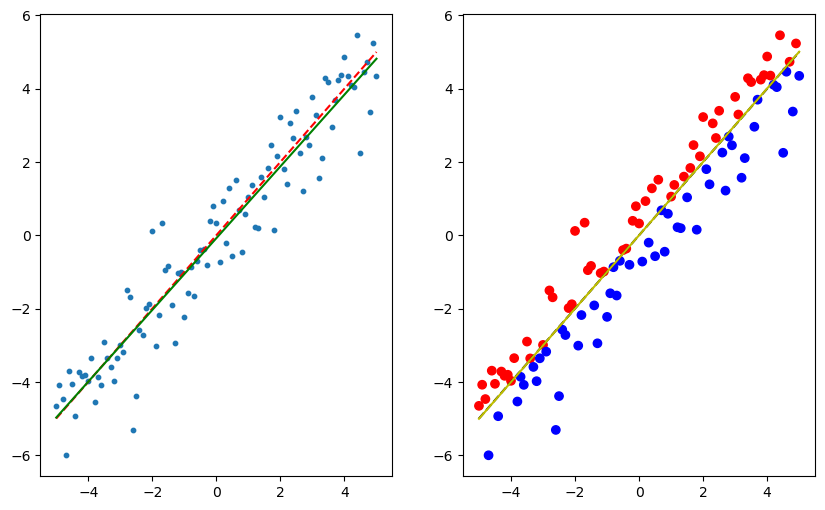

In [ ]:
from sklearn.linear_model import LinearRegression

xs = np.linspace(-5, 5, 101)
noise = np.random.default_rng(1).normal(0, 1, size=xs.shape)
ys = xs + noise

linreg = LinearRegression()
data = xs.reshape(-1, 1)
target = ys
linreg.fit(data, target)

perceptron = Perceptron() # 퍼셉트론은 분류 모델이지만, 여기서는 회귀선 근사에 도전
X2 = np.column_stack((xs, ys))
target = np.where(ys > xs, 1, -1)
params = perceptron.fit(X2, target, 학습횟수=30, 학습률=0.01)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(xs, ys, s=10)
plt.plot(xs, ys - noise, 'r--')
plt.plot(xs, linreg.predict(data), 'g-')

plt.subplot(1, 2, 2)
plt.scatter(xs, ys, c=perceptron(X2), cmap='bwr')
plt.plot(xs, ys - noise, 'k--')

# 결정경계
z_decision = lambda x, w, b: (w[0]*x + b) / -w[1] 
plt.plot(xs, z_decision(xs, perceptron.w, -perceptron.b), 'y-')

plt.show()



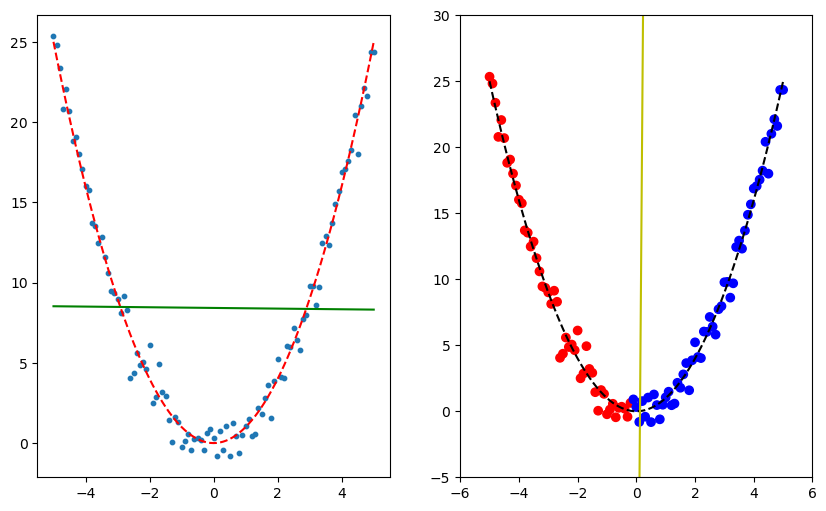

In [99]:
from sklearn.linear_model import LinearRegression

xs = np.linspace(-5, 5, 101)
noise = np.random.default_rng(1).normal(0, 1, size=xs.shape)
ys = xs ** 2 + noise

linreg = LinearRegression()
data = xs.reshape(-1, 1)
target = ys
linreg.fit(data, target)

perceptron = Perceptron() # 퍼셉트론은 분류 모델이지만, 여기서는 회귀선 근사에 도전
X2 = np.column_stack((xs, ys))
target = np.where(ys > ys - noise, 1, -1)
params = perceptron.fit(X2, target, 학습횟수=30, 학습률=0.01)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

plt.scatter(xs, ys, s=10)
plt.plot(xs, ys - noise, 'r--')
plt.plot(xs, linreg.predict(data), 'g-')


plt.subplot(1, 2, 2)
plt.scatter(xs, ys, c=perceptron(X2), cmap='bwr')
plt.plot(xs, ys - noise, 'k--')

# 결정경계
z_decision = lambda x, w, b: (w[0]*x + b) / -w[1] 
plt.plot(xs, z_decision(xs, perceptron.w, -perceptron.b), 'y-')
plt.xlim(-6, 6)
plt.ylim(-5, 30)

plt.show()



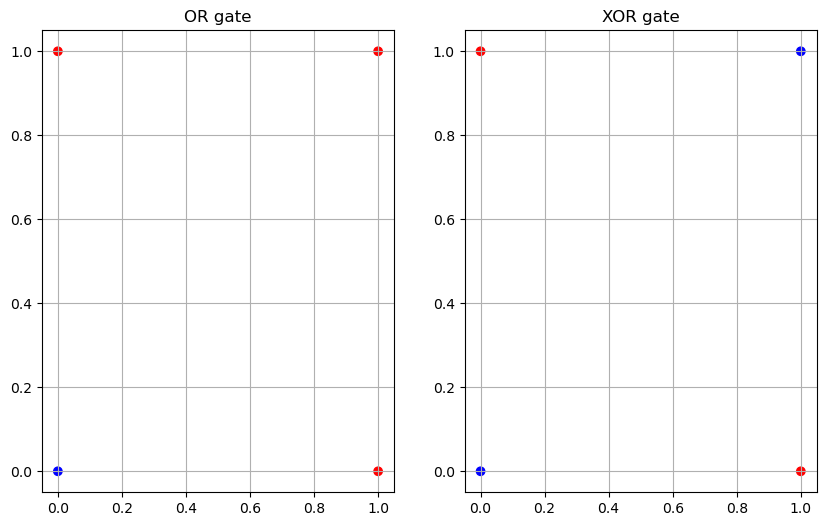

In [103]:
Xs = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([-1, 1, 1, 1])

OR = Perceptron()
params = OR.fit(Xs, y_or, 학습횟수=10, 학습률=1)
assert np.all(OR(Xs) == y_or)

y_xor = np.array([-1, 1, 1, -1])
XOR = Perceptron()
params = XOR.fit(Xs, y_xor, 학습횟수=10, 학습률=1)
# 퍼셉트론으로는 XOR 게이트를 학습할 수 없음
assert not np.all(XOR(Xs) == y_xor) 

AND = Perceptron()
NAND = Perceptron()
AND.fit(Xs, np.array([-1, -1, -1, 1]), 학습횟수=10, 학습률=1)
assert np.all(AND(Xs) == np.array([-1, -1, -1, 1]))
NAND.fit(Xs, np.array([1, 1, 1, -1]), 학습횟수=10, 학습률=1)
assert np.all(NAND(Xs) == np.array([1, 1, 1, -1]))

#XOR 게이트 구현
def XOR_gate(Xs):
    중간1 = NAND(Xs)
    중간2 = OR(Xs)
    S = np.column_stack((중간1, 중간2))
    y = AND(S)
    return y

y_xor = np.array([-1, 1, 1, -1])
assert np.all(XOR_gate(Xs) == y_xor)


plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.scatter(Xs[:,0], Xs[:,1], c=y_or, cmap='bwr')
plt.title('OR gate')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(Xs[:,0], Xs[:,1], c=y_xor, cmap='bwr')
plt.title('XOR gate')
plt.grid()
plt.show()


## 신경망

신경망의 계층은 종종 여러 개의 퍼셉트론이 동시에 입력을 처리함.
그래서 다중 퍼셉트론 구성과 연산이 필요.

In [104]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data.shape)
print(iris.target_names, '->', np.unique(iris.target))
pd.DataFrame(iris.data, columns=iris.feature_names).head().round(2)

(150, 4)
['setosa' 'versicolor' 'virginica'] -> [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.linear_model import Perceptron

최대학습횟수 = 100; 학습률 = 0.1

model = Perceptron(max_iter=최대학습횟수, eta0=학습률)
model.fit(iris.data, iris.target)
예측 = model.predict(iris.data)
채점 = 예측 == iris.target
print(f"정확도: {채점.sum()}/{len(iris.target)} = {채점.mean():.2%}")

print('shuffle')
표본순서 = np.random.default_rng(3).permutation(len(iris.target))
print(표본순서[:10], '...')  # 처음 10개 표본 인덱스 출력
model.fit(iris.data[표본순서], iris.target[표본순서])
예측 = model.predict(iris.data[표본순서])
채점 = 예측 == iris.target[표본순서]
print(f"정확도: {채점.sum()}/{len(iris.target)} = {채점.mean():.2%}")



정확도: 72/150 = 48.00%
shuffle
[139  32  23  99  60  27  78  83 126 131] ...
정확도: 137/150 = 91.33%


In [ ]:
#매개변수 출력
W = model.coef_
b = model.intercept_
pd.DataFrame(W, columns=iris.feature_names, index=iris.target_names).round(2)

# 퍼셉트론이 3개. (다중 퍼셉트론 연산)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.21,0.76,-0.9,-0.41
versicolor,1.75,-2.86,0.5,-3.35
virginica,-2.99,-2.57,4.3,3.89


In [128]:
# 다중 퍼셉트론 연산
outputs = np.dot(iris.data, W.T) + b
예측 = np.argmax(outputs, axis=1)
pd.DataFrame(outputs, columns=['y=0', 'y=1', 'y=2']).assign(예측=예측, 정답=iris.target).sample(10).round(2)

,y=0,y=1,y=2,예측,정답
83,-1.83,1.57,1.57,2,1
139,-1.82,0.47,1.09,2,2
22,2.82,-0.82,-19.63,0,0
82,-0.63,1.96,-4.54,1,1
112,-2.00,0.64,2.08,2,2
145,-1.84,-0.36,1.86,2,2
58,-0.98,2.80,-4.05,1,1
26,2.13,0.09,-16.95,0,0
115,-1.84,-1.41,2.68,2,2
35,2.42,1.13,-18.94,0,0


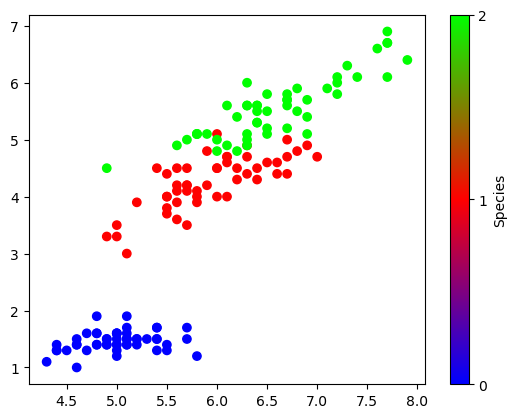

In [ ]:




x1 = iris.data[:, 0]  # sepal length
x3 = iris.data[:, 2]  # petal length

plt.scatter(x1, x3, c=iris.target, cmap='brg')
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.show()